# Regresyon Örneği

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn import metrics

In [49]:
df_mpg = pd.read_csv('https://data.heatonresearch.com/data/t81-558/auto-mpg.csv')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [51]:
df_mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [52]:
df_mpg.horsepower.astype(float)

ValueError: could not convert string to float: '?'

In [53]:
df_mpg.horsepower[df_mpg.horsepower == '?']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [54]:
df_mpg.loc[df_mpg.horsepower == "?", 'horsepower'] ='0' 

In [55]:
df_mpg.horsepower[df_mpg.horsepower == '?']

Series([], Name: horsepower, dtype: object)

In [56]:
df_mpg['horsepower'] = df_mpg['horsepower'].astype(float)

In [57]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [58]:
df_mpg.loc[df_mpg.horsepower == 0, 'horsepower' ] = df_mpg.horsepower.median()

In [59]:
# df = pd.read_csv('https://data.heatonresearch.com/data/t81-558/auto-mpg.csv',
#                 na_values=['NA', '?'])

In [60]:
X = df_mpg[['cylinders', 'displacement', 'horsepower', 'weight',
'acceleration', 'year', 'origin']]. values

In [61]:
y = df_mpg.mpg.values

<li> Aşağıdaki kod dört katman içerir. İlk katman girdi katmanıdır</li>
<li>çünkü programcının veri kümesinin sahip olduğu girdi sayısı olarak ayarladığı input_dim parametresini içerir.</li> 
<li>Ağ, veri setindeki her sütun için bir giriş nöronuna ihtiyaç duyar</li>
<li>Her biri 25 ve 10 nöron içeren iki gizli katmana sahiptir. </li>
<li>Tasarlayanların bu sayıları nasıl seçtiği merak edilir. 
Gizli bir nöron yapısının seçilmesi, sinir ağları hakkında en sık sorulan sorulardan biridir. 
Maalesef doğru bir cevap yok. Bunlar hiperparametrelerdir. 
Sinir ağı performansını etkileyebilecek ayarlardır, ancak bunları ayarlamanın bir yolu yoktur.</li>
<li>Genel olarak, daha fazla gizli nöron, karmaşık problemlere overfitting yeteneği anlamına gelir. 
Bununla birlikte, çok fazla nöron aşırı uyum ve uzun eğitim sürelerine yol açabilir. 
Çok azı sorunun yetersiz kalmasına neden olabilir ve doğruluktan ödün verir. 
Ayrıca, sahip olunan katman sayısı başka bir hiperparametredir. 
Genel olarak, daha fazla katman, sinir ağının feature engineering ve data preprocessing işlemlerini
daha fazla gerçekleştirebilmesini sağlar.
Ancak bu aynı zamanda eğitim süreleri ve gereğinden fazla overfitting riski anlamına da gelir</li>
<li>Genel olarak, nöron sayımlarının giriş katmanının yakınında daha büyük başladığını ve bir 
çeşit üçgen şeklinde çıktı katmanına doğru küçülme eğiliminde olduğu görülür.</li>

<img src='activation.png'/>
<center>Kaynak : https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02-f1c56aa8</center>

In [16]:
model_mpg = Sequential()
model_mpg.add(Dense(25, input_dim=X.shape[1], activation='relu')) #hidden layer1
model_mpg.add(Dense(10, activation='relu')) # hidden layer2
model_mpg.add(Dense(1, activation='linear')) # output

verbose=0 - İlerleme çıktısı yok  
verbose=1 - İlerleme çubuğunu göster  
verbose=2 - Özet ilerleme çıktısı  

In [17]:
model_mpg.compile(loss='mean_squared_error', optimizer='adam')
model_mpg.fit(X, y, verbose=2, epochs=200)

Epoch 1/200
13/13 - 0s - loss: 4066.7805
Epoch 2/200
13/13 - 0s - loss: 1055.3091
Epoch 3/200
13/13 - 0s - loss: 430.8897
Epoch 4/200
13/13 - 0s - loss: 267.9541
Epoch 5/200
13/13 - 0s - loss: 217.9025
Epoch 6/200
13/13 - 0s - loss: 191.0600
Epoch 7/200
13/13 - 0s - loss: 171.9634
Epoch 8/200
13/13 - 0s - loss: 155.4940
Epoch 9/200
13/13 - 0s - loss: 140.2858
Epoch 10/200
13/13 - 0s - loss: 126.0782
Epoch 11/200
13/13 - 0s - loss: 114.2930
Epoch 12/200
13/13 - 0s - loss: 103.0083
Epoch 13/200
13/13 - 0s - loss: 93.6758
Epoch 14/200
13/13 - 0s - loss: 85.6897
Epoch 15/200
13/13 - 0s - loss: 79.7059
Epoch 16/200
13/13 - 0s - loss: 71.6312
Epoch 17/200
13/13 - 0s - loss: 66.0786
Epoch 18/200
13/13 - 0s - loss: 60.9446
Epoch 19/200
13/13 - 0s - loss: 58.2863
Epoch 20/200
13/13 - 0s - loss: 54.8772
Epoch 21/200
13/13 - 0s - loss: 50.7750
Epoch 22/200
13/13 - 0s - loss: 48.1782
Epoch 23/200
13/13 - 0s - loss: 47.2327
Epoch 24/200
13/13 - 0s - loss: 43.3063
Epoch 25/200
13/13 - 0s - loss: 42.

In [18]:
y_pred = model_mpg.predict(X)

In [19]:
np.sqrt(metrics.mean_squared_error(y, y_pred))

4.000443358798164

# Tahminleme

Oluşturulan modeli kullanarak tahmin yapabilmek için modelin predict metodu kullanılır

In [22]:
predict = model_mpg.predict(X)

In [23]:
X.shape

(398, 7)

In [24]:
#RMSE
import math
math.sqrt(metrics.mean_squared_error(y, predict))

4.000443358798164

In [25]:
for i in range(10):
    print(f"{i+1}. Araba İsmi : {df_mpg.name[i]}, MPG: {y[i]}, tahmin edilen MPG : {predict[i][0]}" )

1. Araba İsmi : chevrolet chevelle malibu, MPG: 18.0, tahmin edilen MPG : 18.359580993652344
2. Araba İsmi : buick skylark 320, MPG: 15.0, tahmin edilen MPG : 17.45086669921875
3. Araba İsmi : plymouth satellite, MPG: 18.0, tahmin edilen MPG : 17.133934020996094
4. Araba İsmi : amc rebel sst, MPG: 16.0, tahmin edilen MPG : 16.512969970703125
5. Araba İsmi : ford torino, MPG: 17.0, tahmin edilen MPG : 16.77355194091797
6. Araba İsmi : ford galaxie 500, MPG: 15.0, tahmin edilen MPG : 17.701278686523438
7. Araba İsmi : chevrolet impala, MPG: 14.0, tahmin edilen MPG : 17.03802490234375
8. Araba İsmi : plymouth fury iii, MPG: 14.0, tahmin edilen MPG : 16.4937744140625
9. Araba İsmi : pontiac catalina, MPG: 14.0, tahmin edilen MPG : 16.791305541992188
10. Araba İsmi : amc ambassador dpl, MPG: 15.0, tahmin edilen MPG : 16.537612915039062


# Sınıflandırma Örneği

<li>Sınıflandırma, bir sinir ağının girdiyi bir veya daha fazla sınıfa atamaya çalıştığı süreçtir. Bir sınıflandırma ağını değerlendirmenin en basit yolu, yanlış sınıflandırılan eğitim seti öğelerinin yüzdesini izlemektir. </li>


In [27]:
df_iris = pd.read_csv('https://data.heatonresearch.com/data/t81-558/iris.csv', 
                na_values =[ 'NA', '?'])
df_iris.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
X = df_iris.iloc[:, 0:4].values
y = pd.get_dummies(df_iris['species']).values
cesitler = pd.get_dummies(df_iris['species']).columns
cesitler

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [31]:
model_iris = Sequential()
model_iris.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model_iris.add(Dense(25, activation='relu'))
model_iris.add(Dense(y.shape[1], activation='softmax'))

In [32]:
model_iris.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 78        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_iris.compile(loss='categorical_crossentropy', optimizer='adam')

In [34]:
model_iris.fit(X, y, verbose=2, epochs=100)

Epoch 1/100
5/5 - 0s - loss: 3.6845
Epoch 2/100
5/5 - 0s - loss: 2.8710
Epoch 3/100
5/5 - 0s - loss: 2.1248
Epoch 4/100
5/5 - 0s - loss: 1.5641
Epoch 5/100
5/5 - 0s - loss: 1.2195
Epoch 6/100
5/5 - 0s - loss: 1.0398
Epoch 7/100
5/5 - 0s - loss: 0.9564
Epoch 8/100
5/5 - 0s - loss: 0.9231
Epoch 9/100
5/5 - 0s - loss: 0.8928
Epoch 10/100
5/5 - 0s - loss: 0.8490
Epoch 11/100
5/5 - 0s - loss: 0.8046
Epoch 12/100
5/5 - 0s - loss: 0.7714
Epoch 13/100
5/5 - 0s - loss: 0.7483
Epoch 14/100
5/5 - 0s - loss: 0.7220
Epoch 15/100
5/5 - 0s - loss: 0.6977
Epoch 16/100
5/5 - 0s - loss: 0.6744
Epoch 17/100
5/5 - 0s - loss: 0.6509
Epoch 18/100
5/5 - 0s - loss: 0.6305
Epoch 19/100
5/5 - 0s - loss: 0.6011
Epoch 20/100
5/5 - 0s - loss: 0.5816
Epoch 21/100
5/5 - 0s - loss: 0.5599
Epoch 22/100
5/5 - 0s - loss: 0.5423
Epoch 23/100
5/5 - 0s - loss: 0.5218
Epoch 24/100
5/5 - 0s - loss: 0.4997
Epoch 25/100
5/5 - 0s - loss: 0.4805
Epoch 26/100
5/5 - 0s - loss: 0.4636
Epoch 27/100
5/5 - 0s - loss: 0.4461
Epoch 28/1

In [35]:
predict_species = model_iris.predict(X)
predict_species[0:5]

array([[9.9713612e-01, 2.7868806e-03, 7.6977929e-05],
       [9.9378633e-01, 6.0276673e-03, 1.8600897e-04],
       [9.9540412e-01, 4.4388114e-03, 1.5715694e-04],
       [9.9153858e-01, 8.2058217e-03, 2.5553134e-04],
       [9.9728966e-01, 2.6357176e-03, 7.4706433e-05]], dtype=float32)

In [36]:
np.set_printoptions(suppress=True)

In [37]:
print(predict_species[0:5])

[[0.9971361  0.00278688 0.00007698]
 [0.99378633 0.00602767 0.00018601]
 [0.9954041  0.00443881 0.00015716]
 [0.9915386  0.00820582 0.00025553]
 [0.99728966 0.00263572 0.00007471]]


In [38]:
really_values = np.argmax(y, axis=1)
really_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
predicted_values = np.argmax(predict_species, axis=1)
predicted_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
accuracy_score(really_values, predicted_values)

0.9866666666666667

In [121]:
confusion_matrix(really_values, predicted_values)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

In [42]:
import seaborn as sns

<AxesSubplot:>

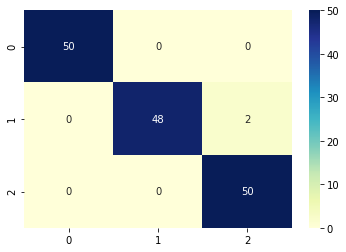

In [43]:
sns.heatmap(confusion_matrix(really_values, predicted_values), annot=True, cmap="YlGnBu")

# yeni veri ile tahminde bulunma

In [44]:
ornek1 = model_iris.predict([[5.0, 3.0, 4.0, 2.0]])
print(ornek1)
cesitler[np.argmax(ornek1)]

[[0.00126984 0.42009455 0.57863563]]


'Iris-virginica'

In [45]:
ornek2 = model_iris.predict([[5.0, 3.0, 4.0, 2.0], [5.2, 3.5, 1.5, 0.8]])
print(ornek2)
cesitler[np.argmax(ornek2, axis=1)]

[[0.00126984 0.42009455 0.57863563]
 [0.99510324 0.00478993 0.00010682]]


Index(['Iris-virginica', 'Iris-setosa'], dtype='object')

# Model kaydetme ve çağırma

Karmaşık sinir ağlarının eğitilmesi uzun zaman almaktadır. Daha sonra yeniden yüklenebilmeleri için eğitilen modeller saklanabilmektedir. Keras, sinir ağından kaydetme için üç format sağlamaktadır.</br>

<li>YAML (ağırlıklar olmadan)</li>
<li>JSON (ağırlıklar olmadan)</li>
<li>HDF5 (ağırlıklar ile)</li>

In [46]:
import os
model_mpg_json = model_mpg.to_json()
with open(os.path.join(os.getcwd(), "network_json.json"), 'w') as json_file:
    json_file.write(model_mpg_json)

model_mpg_yaml = model_mpg.to_yaml()
with open(os.path.join(os.getcwd(), "network_yaml.yaml"), 'w') as yaml_file:
    yaml_file.write(model_mpg_yaml)

model_mpg.save(os.path.join(os.getcwd(), 'model_hdf5.h5'))


In [62]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.path.join(os.getcwd(), 'model_hdf5.h5'))
loaded_model.predict(X)

array([[18.359581 ],
       [17.450867 ],
       [17.133934 ],
       [16.51297  ],
       [16.773552 ],
       [17.701279 ],
       [17.038025 ],
       [16.493774 ],
       [16.791306 ],
       [16.537613 ],
       [19.070145 ],
       [16.3311   ],
       [21.388977 ],
       [20.15017  ],
       [26.450577 ],
       [21.348557 ],
       [21.97335  ],
       [23.757149 ],
       [28.229996 ],
       [33.239033 ],
       [25.164276 ],
       [25.038109 ],
       [27.316635 ],
       [26.494217 ],
       [22.73928  ],
       [12.085341 ],
       [10.781173 ],
       [10.1240835],
       [11.44229  ],
       [28.765034 ],
       [27.519394 ],
       [27.825218 ],
       [31.31369  ],
       [22.777199 ],
       [17.06585  ],
       [19.480354 ],
       [20.639069 ],
       [18.366997 ],
       [16.553802 ],
       [18.228943 ],
       [18.32405  ],
       [16.355225 ],
       [15.4113455],
       [18.144196 ],
       [16.71402  ],
       [20.308899 ],
       [27.601807 ],
       [19.43